This dataset contains statistics on domestic tourism in Thailand from Jan 2019 to Feb 2023, broken down by province. The dataset includes information on the number of tourists, the occupancy rate, and the profits generated by tourism in each province, as well as the nationality of the tourists (Thai vs. foreign).

Sourced from raw data provided by the Official Ministry of Tourism and Sports Statistics, which was manually entered into Excel files 🙃. So I pre-processed the data using Python with the intention of making it more accessible in the appropriate format which has the potential to provide valuable insights into the domestic tourism industry in Thailand, including trends and patterns across different provinces over time. Researchers, analysts, and policymakers with an interest in the domestic tourism sector in Thailand may find this dataset useful for their work.



IMPORTING LIBS

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from autoviz.classify_method import data_cleaning_suggestions
import folium
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

IMPORTING CSV FILES

In [28]:
df=pd.read_csv('thailand_domestic_tourism_2019_2023.csv')

In [29]:
df.head()

,date,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31


TAKING HELP OF "autoviz.classify_method" WHICH HAS "data_cleaning_suggestions"

In [30]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
value,22274,float64,0,0.000000,72.318182,0,highly skewed: drop outliers or do box-cox transform
province_thai,77,object,0,0.000000,0.250000,400,
province_eng,77,object,0,0.000000,0.250000,400,
date,50,object,0,0.000000,0.162338,616,
variable,8,object,0,0.000000,0.025974,3850,
region_thai,5,object,0,0.000000,0.016234,3200,
region_eng,5,object,0,0.000000,0.016234,3200,


CHECKING SHAPE BEFORE ANY TRANSFORMATION

In [31]:
df.shape

(30800, 7)

In [32]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,value
count,30800.00000
mean,65068.09730
std,237332.12563
min,0.00000
25%,42.57750
50%,498.82000
75%,47193.00000
max,6131044.00000


BOX CON TRANSFORMATION AND REMOVE OUTLIERS

In [33]:
std_deviation = 2
mean = df['value'].mean()
std = df['value'].std()

upper_threshold = mean + (std_deviation * std)
lower_threshold = mean - (std_deviation * std)
df = df[(df['value'] >= lower_threshold) & (df['value'] <= upper_threshold)]

In [34]:
df.head()

,date,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31


CHECKING SHAPE AFTER APPLYING BOX CON AND REMOVING OUTLIERS

In [35]:
df.shape

(30077, 7)

DATE TIME LIB


In [36]:
import datetime

In [37]:
df[['year','month','date']] = df['date'].apply(lambda x: pd.Series(str(x).split('-')))

In [38]:
df.head()

,date,province_thai,province_eng,region_thai,region_eng,variable,value,year,month
0,01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37,2019,01
1,01,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32,2019,01
2,01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37,2019,01
3,01,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33,2019,01
4,01,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31,2019,01


CONVERT DATETIME TO INT AS IT IS IN OBJECT AND IT WILL HELP IN PLOTTING 

In [39]:
df["date"]=df["date"].astype(int)
df["year"]=df["year"].astype(int)
df["month"]=df["month"].astype(int)

In [40]:
df.head()

,date,province_thai,province_eng,region_thai,region_eng,variable,value,year,month
0,1,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37,2019,1
1,1,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32,2019,1
2,1,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37,2019,1
3,1,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33,2019,1
4,1,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31,2019,1


GRPAHS

In [45]:
import plotly.express as px
fig = px.bar(df, 
             x='year', y='value', color_discrete_sequence=['purple'],
             title='Thailand Domestic Tourism', text='region_eng')
fig.show()

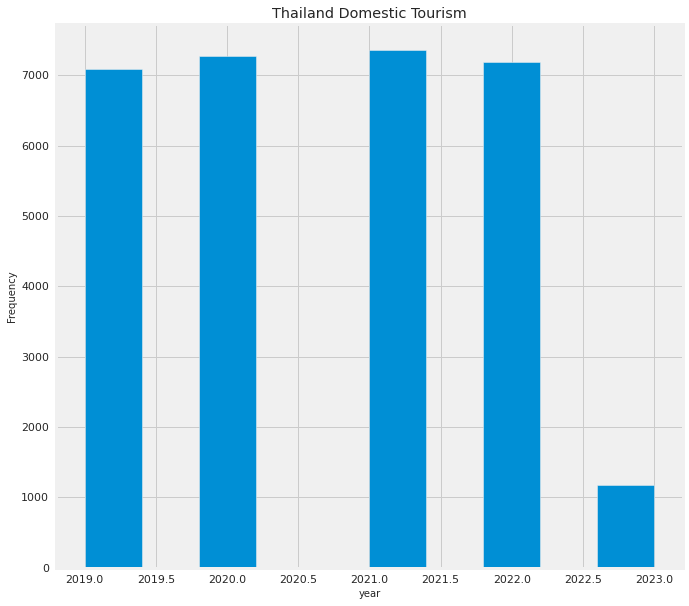

In [49]:
plt.figure(figsize=(10,10))
df['year'].plot.hist()
plt.title("Thailand Domestic Tourism")#Today is 05/12/2022 December!
plt.xlabel("year");
plt.show()

In [50]:
def plot_line_chart_by_year(df, year, column):
    
    # Group the mean data by year
    mean_by_year = df.groupby(year)[column].mean()

    # Style
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))

    # Plot the line chart
    plt.plot(mean_by_year.index, mean_by_year.values, color='limegreen', linewidth=2)

    # Set up other visual elements
    plt.xlabel(year, fontsize = 14, color = 'white')
    plt.ylabel(column, fontsize = 14, color = 'white')
    plt.title(f'{column} by Year', fontsize = 16, color = 'white')

    # Set the colors of ticks and texts
    plt.tick_params(colors = 'white')
    plt.xticks(fontsize = 12, color = 'white')
    plt.yticks(fontsize = 12, color = 'white')
    
    plt.show()


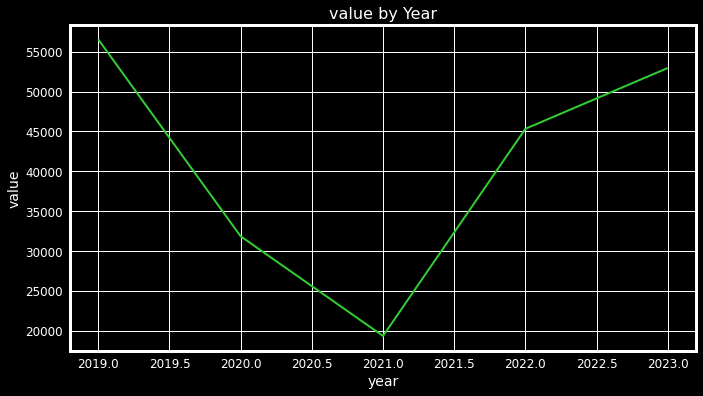

In [51]:
plot_line_chart_by_year(df, 'year', 'value')

END